In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/annycruzsalcedo/datasets/main/IMDB%20Horror%20movies.csv')

In [3]:
df.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [4]:
df.shape

(3328, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3328 non-null   object 
 1   Genres             3327 non-null   object 
 2   Release Date       3328 non-null   object 
 3   Release Country    3328 non-null   object 
 4   Movie Rating       1451 non-null   object 
 5   Review Rating      3076 non-null   float64
 6   Movie Run Time     2784 non-null   object 
 7   Plot               3327 non-null   object 
 8   Cast               3314 non-null   object 
 9   Language           3257 non-null   object 
 10  Filming Locations  2096 non-null   object 
 11  Budget             1234 non-null   object 
dtypes: float64(1), object(11)
memory usage: 312.1+ KB


In [6]:
df.isnull().sum()

Title                   0
Genres                  1
Release Date            0
Release Country         0
Movie Rating         1877
Review Rating         252
Movie Run Time        544
Plot                    1
Cast                   14
Language               71
Filming Locations    1232
Budget               2094
dtype: int64

In [7]:
# Search for the word 'Null' in the entire DataFrame using applymap
contains_null = df.applymap(lambda cell: 'Null' in str(cell))

# Print the result indicating which cells contain 'Null'
print(contains_null)

      Title  Genres  Release Date  Release Country  Movie Rating  \
0     False   False         False            False         False   
1     False   False         False            False         False   
2     False   False         False            False         False   
3     False   False         False            False         False   
4     False   False         False            False         False   
...     ...     ...           ...              ...           ...   
3323  False   False         False            False         False   
3324  False   False         False            False         False   
3325  False   False         False            False         False   
3326  False   False         False            False         False   
3327  False   False         False            False         False   

      Review Rating  Movie Run Time   Plot   Cast  Language  \
0             False           False  False  False     False   
1             False           False  False  False     Fal

In [8]:
# Replace 'Null' and whitespace with NaN in the entire dataset using a regular expression
df.replace(r'^(Null|\s*)$', np.nan, regex=True, inplace=True)

# Print the DataFrame with replacements
print(df)

                                     Title  \
0                               Gut (2012)   
1          The Haunting of Mia Moss (2017)   
2                      Sleepwalking (2017)   
3      Treasure Chest of Horrors II (2013)   
4                           Infidus (2015)   
...                                    ...   
3323            Victor Frankenstein (2015)   
3324  The Exorcism of Molly Hartley (2015)   
3325                    Talon Falls (2017)   
3326    BloodRayne: The Third Reich (2011)   
3327                     13 Cameras (2015)   

                                   Genres Release Date Release Country  \
0                 Drama| Horror| Thriller    26-Oct-12             USA   
1                                  Horror    13-Jan-17             USA   
2                                  Horror    21-Oct-17          Canada   
3                Comedy| Horror| Thriller    23-Apr-13             USA   
4                    Crime| Drama| Horror    10-Apr-15             USA   
...

In [9]:
df.duplicated().sum()

16

In [10]:
df['Languages'] = df['Language'].apply(lambda x: x.split('|')[0].strip() if isinstance(x, str) else None)
df.head(2)

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Languages
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,English
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",English


In [11]:
#filter random row to see its complete data
df.iloc[1794]

Title                                                Bloodlands (2017)
Genres                                         Drama| Horror| Thriller
Release Date                                                 25-Feb-17
Release Country                                                     UK
Movie Rating                                                       NaN
Review Rating                                                      6.4
Movie Run Time                                                  82 min
Plot                 Directed by Steven Kastrissios. With Gëzim Rud...
Cast                 Gëzim Rudi|Emiljano Palali|Suela Bako|Alesia X...
Language                                             Albanian|Albanian
Filming Locations                                      Tirana, Albania
Budget                                                             NaN
Languages                                                     Albanian
Name: 1794, dtype: object

In [12]:
df['Languages'].unique()

array(['English', 'Italian', 'Japanese', 'Hindi', 'Mandarin', 'Malayalam',
       'Filipino', 'Tamil', 'Indonesian', 'Spanish', 'Malay', 'Turkish',
       'Russian', None, 'German', 'Thai', 'Telugu', 'French', 'Urdu',
       'Chinese', 'Swedish', 'Latvian', 'Romanian', 'Serbian', 'Dutch',
       'Cantonese', 'Portuguese', 'Icelandic', 'Kannada', 'Hebrew',
       'Czech', 'Korean', 'Greek', 'Divehi', 'Danish', 'Vietnamese',
       'Finnish', 'Albanian', 'Marathi', 'Bengali', 'Norwegian', 'Slovak',
       'Hungarian', 'Polish', 'Sinhalese', 'Greenlandic', 'Arabic',
       'Catalan', 'Lao', 'Slovenian', 'Aboriginal', 'Persian',
       'Bulgarian', 'Basque', 'Flemish', 'None'], dtype=object)

In [13]:
df['Languages'].value_counts().head(60)

English        2560
Spanish         109
Japanese         87
Filipino         43
Hindi            41
Thai             36
Tamil            34
German           33
Turkish          30
Indonesian       24
Korean           22
French           21
Mandarin         18
Russian          17
Italian          15
Portuguese       14
Malay            13
Swedish          13
Malayalam        12
Chinese          12
Kannada          11
Telugu           11
Cantonese         9
Norwegian         7
Danish            6
Vietnamese        6
Dutch             5
Arabic            4
Bengali           3
Persian           3
Urdu              3
Polish            3
Finnish           3
Serbian           2
Catalan           2
Hungarian         2
Slovak            2
Romanian          2
Icelandic         2
Albanian          2
Lao               1
Flemish           1
Basque            1
Bulgarian         1
Latvian           1
Aboriginal        1
Slovenian         1
Marathi           1
Hebrew            1
Greenlandic       1


In [14]:
df['Review Rating'].unique()

array([3.9, nan, 3.7, 5.8, 5.1, 6.5, 4.6, 5.4, 5.3, 3.6, 5.9, 2.8, 6. ,
       2.7, 7.1, 3.4, 4.7, 4. , 6.6, 4.5, 4.1, 4.3, 5. , 7.2, 6.2, 5.7,
       5.6, 6.9, 7. , 7.3, 6.3, 2.1, 4.2, 4.4, 8.4, 3.8, 2. , 3.5, 8.3,
       3.1, 1.4, 2.3, 2.2, 4.9, 2.5, 2.9, 7.9, 3. , 2.4, 4.8, 6.8, 7.4,
       3.3, 6.7, 1.9, 6.4, 8.7, 5.5, 6.1, 3.2, 7.7, 8. , 5.2, 7.8, 8.6,
       7.6, 9. , 7.5, 2.6, 1.7, 8.2, 1.6, 8.9, 8.1, 9.5, 9.3, 8.8, 8.5,
       9.2, 1.8, 1.2, 9.1, 1. , 9.4, 9.6, 9.8, 1.5, 1.3])

In [15]:
df['Review Rating'].value_counts().head(60)

4.7    95
5.2    89
5.7    89
5.0    83
4.8    83
4.6    82
5.6    81
4.3    80
5.3    78
5.1    78
5.4    77
4.2    76
4.5    75
3.6    73
4.0    73
5.9    72
5.8    72
4.9    70
4.4    69
3.5    65
5.5    65
3.9    61
3.4    60
6.2    59
6.1    59
6.4    57
4.1    54
6.3    52
6.5    52
3.7    52
6.8    51
6.0    49
3.8    48
3.2    45
6.9    44
3.1    40
6.6    39
6.7    38
7.0    37
3.3    37
7.1    30
7.4    27
2.7    26
2.8    26
3.0    25
2.9    23
2.4    22
7.2    21
2.6    20
7.5    20
7.8    19
7.7    18
2.5    17
8.2    16
7.3    16
2.3    15
7.6    15
7.9    14
2.2    14
8.1    12
Name: Review Rating, dtype: int64

In [16]:
df['Review Rating'].value_counts().tail(29)

2.2    14
8.1    12
8.0    11
8.4    10
1.9    10
8.3    10
2.1     8
9.0     7
2.0     6
1.7     6
8.6     6
8.8     4
1.8     4
9.1     4
8.5     4
1.6     4
8.7     4
9.5     3
8.9     3
1.5     3
9.3     2
9.2     2
1.0     2
9.4     2
9.6     2
1.4     1
1.2     1
9.8     1
1.3     1
Name: Review Rating, dtype: int64

In [17]:
df['Movie Run Time'].unique()

array(['91 min', nan, '82 min', '80 min', '93 min', '90 min', '117 min',
       '138 min', '87 min', '70 min', '72 min', '85 min', '102 min',
       '86 min', '105 min', '64 min', '100 min', '95 min', '88 min',
       '75 min', '84 min', '83 min', '89 min', '74 min', '125 min',
       '140 min', '135 min', '81 min', '116 min', '104 min', '69 min',
       '99 min', '96 min', '73 min', '108 min', '119 min', '94 min',
       '52 min', '76 min', '79 min', '120 min', '137 min', '60 min',
       '92 min', '124 min', '67 min', '78 min', '71 min', '61 min',
       '118 min', '16 min', '144 min', '98 min', '101 min', '151 min',
       '110 min', '114 min', '136 min', '77 min', '65 min', '45 min',
       '97 min', '122 min', '106 min', '109 min', '123 min', '131 min',
       '113 min', '156 min', '103 min', '126 min', '111 min', '48 min',
       '132 min', '130 min', '139 min', '107 min', '66 min', '49 min',
       '51 min', '150 min', '68 min', '180 min', '166 min', '133 min',
       '134 min',

In [18]:
df['Run Time'] = df['Movie Run Time'].apply(lambda x: x.rsplit('m')[0].strip() if isinstance(x, str) else None)
df.tail(10)

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Languages,Run Time
3318,Eloise (2017),Horror| Mystery| Thriller,3-Feb-17,USA,R,4.5,89 min,Directed by Robert Legato. With Chace Crawford...,Chace Crawford|Eliza Dushku|Brandon T. Jackson...,English,"Eloise Insane Asylum, Westland, Michigan, USA",NaN,English,89
3319,Insidious: Chapter 3 (2015),Horror| Mystery| Thriller,5-Jun-15,USA,PG-13,6.1,97 min,Directed by Leigh Whannell. With Dermot Mulron...,Dermot Mulroney|Stefanie Scott|Angus Sampson|L...,English,"929 South Broadway, Downtown, Los Angeles, Cal...","$10,000,000",English,97
3320,The Purge (2013),Horror| Sci-Fi| Thriller,7-Jun-13,USA,R,5.7,85 min,"Directed by James DeMonaco. With Ethan Hawke, ...",Ethan Hawke|Lena Headey|Max Burkholder|Adelaid...,English,"Chatsworth, Los Angeles, California, USA","$3,000,000",English,85
3321,Before I Wake (2016),Drama| Fantasy| Horror| Thriller,2017,USA,PG-13,6.1,97 min,"Directed by Mike Flanagan. With Kate Bosworth,...",Kate Bosworth|Thomas Jane|Jacob Tremblay|Annab...,English,"Fairhope, Alabama, USA",NaN,English,97
3322,13 Sins (2014),Horror| Thriller,11-Apr-14,Poland,R,6.3,93 min,"Directed by Daniel Stamm. With Mark Webber, De...",Mark Webber|Devon Graye|Tom Bower|Rutina Wesle...,English,"New Orleans, Louisiana, USA","$4,000,000",English,93
3323,Victor Frankenstein (2015),Drama| Horror| Sci-Fi| Thriller,25-Nov-15,USA,PG-13,6.0,110 min,Directed by Paul McGuigan. With Daniel Radclif...,Daniel Radcliffe|Jessica Brown Findlay|Bronson...,English,"London, England, UK","$40,000,000",English,110
3324,The Exorcism of Molly Hartley (2015),Horror,9-Oct-15,USA,UNRATED,4.6,96 min,"Directed by Steven R. Monroe. With Sarah Lind,...",Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,English,"Winnipeg, Manitoba, Canada",NaN,English,96
3325,Talon Falls (2017),Horror,13-Oct-17,USA,NaN,4.6,75 min,"Directed by Joshua Shreve. With Brad Bell, Jor...",Brad Bell|Jordyn Rudolph|Ryan Rudolph|Morgan W...,English,NaN,NaN,English,75
3326,BloodRayne: The Third Reich (2011),Action| Adventure| Fantasy| Horror,17-Mar-12,Japan,R,3.0,79 min,"Directed by Uwe Boll. With Natassia Malthe, Br...",Natassia Malthe|Brendan Fletcher|Michael Paré|...,English,"Zagreb, Croatia","$10,000,000",English,79
3327,13 Cameras (2015),Drama| Horror,15-Apr-16,USA,NaN,5.1,87 min,Directed by Victor Zarcoff. With Neville Archa...,Neville Archambault|Sean Carrigan|PJ McCabe|Br...,English,"Escondido, California, USA",NaN,English,87


In [19]:
df.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Languages,Run Time
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,English,91
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",English,None
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,English,None
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,English,82
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,Italian,80


In [20]:
df['Release Date'].unique()

array(['26-Oct-12', '13-Jan-17', '21-Oct-17', ..., '13-Jan-16',
       '29-Jul-17', '25-Nov-15'], dtype=object)

In [21]:
df['Release Date'].value_counts().head(14)

2017         119
2016          44
2015          25
31-Oct-17     23
2014          22
16-Oct-15     17
2012          16
2013          15
31-Oct-16     15
1-Apr-16      14
13-Oct-17     14
1-Jul-16      13
1-Oct-17      13
22-Sep-17     13
Name: Release Date, dtype: int64

In [22]:
df['Release Year'] = df['Release Date'].apply(lambda Release_Date: Release_Date.split('-')[-1])
df.head(2)

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Languages,Run Time,Release Year
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,English,91,12
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",English,None,17


In [23]:
df['Release Year'].unique()

array(['12', '17', '13', '15', '2017', '14', '16', '2013', '2012', '2016',
       '2015', '2014'], dtype=object)

In [24]:
df['Release Year'].dtype

dtype('O')

In [25]:
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')

In [26]:
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce')

In [27]:
df.describe()

,Review Rating,Release Year
count,3076.000000,3328.000000
mean,5.077016,159.769531
std,1.474272,518.659391
min,1.000000,12.000000
25%,4.000000,14.000000
50%,5.000000,15.000000
75%,6.100000,17.000000
max,9.800000,2017.000000


In [28]:
# Use the replace method to change values
df['Release Year'].replace({12: 2012, 13: 2013, 14: 2014, 15: 2015, 16: 2016, 17: 2017}, inplace=True)
df.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Languages,Run Time,Release Year
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,English,91,2012
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",English,None,2017
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,English,None,2017
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,English,82,2013
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,Italian,80,2015


In [29]:
df['Release Year'].value_counts()

2017    780
2016    649
2015    602
2014    523
2013    429
2012    345
Name: Release Year, dtype: int64

<Axes: >

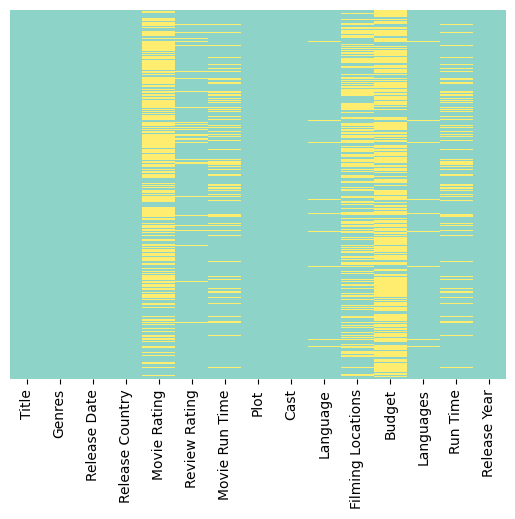

In [30]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Set3')

In [31]:
# Drop one or more columns
columns_to_drop = ['Movie Run Time', 'Release Date', 'Movie Rating', 'Language', 'Filming Locations', 'Budget']  # List of column names to drop
df = df.drop(columns=columns_to_drop)

In [32]:
df.head()

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year
0,Gut (2012),Drama| Horror| Thriller,USA,3.9,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,91,2012
1,The Haunting of Mia Moss (2017),Horror,USA,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,None,2017
2,Sleepwalking (2017),Horror,Canada,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,None,2017
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,USA,3.7,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,82,2013
4,Infidus (2015),Crime| Drama| Horror,USA,5.8,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,80,2015


In [33]:
df.tail()

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year
3323,Victor Frankenstein (2015),Drama| Horror| Sci-Fi| Thriller,USA,6.0,Directed by Paul McGuigan. With Daniel Radclif...,Daniel Radcliffe|Jessica Brown Findlay|Bronson...,English,110,2015
3324,The Exorcism of Molly Hartley (2015),Horror,USA,4.6,"Directed by Steven R. Monroe. With Sarah Lind,...",Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,English,96,2015
3325,Talon Falls (2017),Horror,USA,4.6,"Directed by Joshua Shreve. With Brad Bell, Jor...",Brad Bell|Jordyn Rudolph|Ryan Rudolph|Morgan W...,English,75,2017
3326,BloodRayne: The Third Reich (2011),Action| Adventure| Fantasy| Horror,Japan,3.0,"Directed by Uwe Boll. With Natassia Malthe, Br...",Natassia Malthe|Brendan Fletcher|Michael Paré|...,English,79,2012
3327,13 Cameras (2015),Drama| Horror,USA,5.1,Directed by Victor Zarcoff. With Neville Archa...,Neville Archambault|Sean Carrigan|PJ McCabe|Br...,English,87,2016


In [34]:
# Assuming 'Genres' is a column in a pandas DataFrame
unique_genres = df['Genres'].str.split('|').explode().str.strip().unique().tolist()
unique_genres

['Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Crime',
 'Action',
 'Sci-Fi',
 'Mystery',
 'Adventure',
 'Fantasy',
 'Romance',
 'War',
 'Western',
 'Sport',
 'Animation',
 'History',
 'Musical',
 'Music',
 'Family',
 nan,
 'Biography',
 'Adult',
 'Reality-TV']

In [35]:
##df['Director'] = df['Plot'].apply(lambda x: x.split('y', 1)[-1].split('.', 1)[0].strip() if isinstance(x, str) else None)
##df.head()

In [36]:
##df['Director'] = df['Plot'].apply(lambda x: x.split('.', 1)[0].strip() if isinstance(x, str) else None)

In [37]:
df['Director'] = df['Plot'].str.extract('y(.*?)\.')

In [38]:
df.head()

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
0,Gut (2012),Drama| Horror| Thriller,USA,3.9,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,91,2012,Elias
1,The Haunting of Mia Moss (2017),Horror,USA,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,None,2017,Jake Zelch
2,Sleepwalking (2017),Horror,Canada,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,None,2017,David Briggs
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,USA,3.7,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,82,2013,M
4,Infidus (2015),Crime| Drama| Horror,USA,5.8,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,80,2015,Giulio De Santi


In [39]:
df['Genres'].unique()

array([' Drama| Horror| Thriller', ' Horror', ' Comedy| Horror| Thriller',
       ' Crime| Drama| Horror', ' Horror| Thriller',
       ' Action| Drama| Horror| Sci-Fi', ' Horror| Mystery| Thriller',
       ' Comedy| Horror', ' Adventure| Comedy| Horror', ' Horror| Sci-Fi',
       ' Drama| Fantasy| Horror| Mystery| Thriller',
       ' Action| Horror| Thriller', ' Drama| Horror| Romance| Thriller',
       ' Fantasy| Horror| Thriller', ' Drama| Horror',
       ' Action| Crime| Horror| Sci-Fi| Thriller',
       ' Horror| Romance| Thriller', ' Drama| Horror| Mystery| Romance',
       ' Action| Horror', ' Crime| Horror| Romance| Thriller',
       ' Action| Horror| Thriller| War', ' Action| Comedy| Horror',
       ' Action| Drama| Horror',
       ' Adventure| Comedy| Drama| Fantasy| Horror| Thriller',
       ' Comedy| Fantasy| Horror', ' Crime| Horror| Thriller',
       ' Drama| Fantasy| Horror| Thriller', ' Drama| Horror| Mystery',
       ' Adventure| Horror| Mystery| Thriller',
       ' Act

In [40]:
df['Genres'].value_counts().head(60)

 Horror                                       1059
 Horror| Thriller                              474
 Comedy| Horror                                245
 Horror| Mystery| Thriller                     172
 Drama| Horror| Thriller                       161
 Drama| Horror                                  72
 Horror| Sci-Fi| Thriller                       66
 Drama| Horror| Mystery| Thriller               53
 Action| Horror| Thriller                       48
 Horror| Mystery                                47
 Action| Horror                                 44
 Horror| Sci-Fi                                 42
 Comedy| Horror| Thriller                       40
 Action| Comedy| Horror                         35
 Crime| Horror| Thriller                        32
 Action| Horror| Sci-Fi                         32
 Fantasy| Horror                                25
 Fantasy| Horror| Thriller                      24
 Action| Horror| Sci-Fi| Thriller               19
 Comedy| Horror| Sci-Fi        

In [41]:
df['Genres'].value_counts().tail(20)

 Fantasy| Horror| Romance| Sci-Fi                                        1
 Drama| Horror| Thriller| Western                                        1
 Animation| Action| Fantasy| Horror                                      1
 Comedy| Family| Horror                                                  1
 Action| Comedy| Drama| Horror| Sci-Fi| Thriller                         1
 Biography| Drama| History| Horror| Mystery| Thriller                    1
 Action| Drama| Horror| Mystery| Sci-Fi| Thriller                        1
 Action| Horror| Western                                                 1
 Action| Crime| Horror| Music| Thriller                                  1
 Animation| Adventure| Comedy| Horror| Thriller                          1
 Action| Comedy| Horror| Musical| Mystery| Romance| Thriller             1
 Horror| Reality-TV| Thriller                                            1
 Action| Adventure| Comedy| Drama| Fantasy| Horror| Romance| Thriller    1
 Comedy| Horror| Musical|

In [42]:
df['Director'].unique()

array([' Elias', ' Jake Zelch', ' David Briggs', ..., ' Joshua Shreve',
       ' Uwe Boll', ' Victor Zarcoff'], dtype=object)

In [43]:
df['Director'].value_counts().head(60)

 David DeCoteau                               12
 Andrew Jones                                 11
 J                                             9
 Rene Perez                                    8
 Manny Velazquez                               8
 Charles Band                                  8
 Jared Cohn                                    7
 Naoyuki Tomomatsu                             7
 Jared Masters                                 6
 Mike Flanagan                                 6
 Mark Polonia                                  6
 Jose Poernomo                                 6
 Alper Mestçi                                  6
 Hasan Karacadag                               6
 Robert Conway                                 5
 John R                                        5
 James Cullen Bressack                         5
 Mickey Keating                                5
 C                                             5
 James Balsamo                                 5
 Takashi Miike      

In [44]:
df['Director'].value_counts().tail(60)

 Benjamin Wilkins                                                     1
 Jimena Monteoliva                                                    1
 Eyra Rahman                                                          1
 Elaine Chu                                                           1
 Dustin Rikert                                                        1
 Steve Goltz                                                          1
 King Jeff                                                            1
 John Williams                                                        1
 Gordon Price                                                         1
 Ariana Kenny                                                         1
 Sôichi Umezawa                                                       1
 Carlo Bruno                                                          1
 Jonas Stolpe                                                         1
 Alek Gearhart                                                  

In [45]:
# Locate rows with 'C' in the 'Director' column
rows_with_C = df[df['Director'].str.strip().str.lower() == 'c']
rows_with_C

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
727,Prairie Dog (2015),Adventure| Drama| Fantasy| Horror| Thriller,USA,7.4,Directed by C. Blake Evernden. With John W. Bo...,John W. Bowers|Sebastian David|Tighe Gill|Step...,English,94,2016,C
984,American Maniacs (2012),Drama| Horror| Thriller,USA,3.3,Directed by C.M. Downs. With Samantha Jane Adl...,Samantha Jane Adler|Miranda Admire|Aminca Bond...,English,None,2012,C
1303,GH5 (2017),Drama| Horror| Thriller,USA,NaN,"Directed by C.J. Goodwyn. With Les Best, Jake ...",Les Best|Jake Crawley|C.J. Goodwyn|Michael Goo...,English,90,2017,C
2376,Rorschach (2015),Horror| Mystery,USA,5.8,"Directed by C.A. Smith. With Ashlynn Allen, Ri...",Ashlynn Allen|Ricky Lee Barnes|Ross Compton|Ja...,English,75,2015,C
2632,The Snare (2017),Horror| Thriller,USA,4.8,"Directed by C.A. Cooper. With Eaoifa Forward, ...",Eaoifa Forward|Dan Paton|Rachel Warren|Fin Ban...,English,90,2017,C


In [46]:
# Locate rows in the 'Director' column and replace their values
df.loc[727, 'Director'] = 'C. Blake Evernden'
df.loc[984, 'Director'] = 'C.M. Downs'
df.loc[1303, 'Director'] = 'C.J. Goodwyn'
df.loc[2376, 'Director'] = 'C.A. Smith'
df.loc[2632, 'Director'] = 'C.A. Cooper'

In [47]:
df.loc[1303]

Title                                                     GH5 (2017)
Genres                                       Drama| Horror| Thriller
Release Country                                                  USA
Review Rating                                                    NaN
Plot               Directed by C.J. Goodwyn. With Les Best, Jake ...
Cast               Les Best|Jake Crawley|C.J. Goodwyn|Michael Goo...
Languages                                                    English
Run Time                                                          90
Release Year                                                    2017
Director                                                C.J. Goodwyn
Name: 1303, dtype: object

In [48]:
# Locate rows with 'B' in the 'Director' column
rows_with_B = df[df['Director'].str.strip().str.lower() == 'b']
rows_with_B

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
517,Kill or be Killed (2017),Drama| Horror| Thriller,UK,NaN,"Directed by B.L. Parker. With Ed Sanders, Tom ...",Ed Sanders|Tom Bott|Montanna Thompson|Jack Bin...,English,None,2017,B
1285,Lechmi (2017),Comedy| Horror,India,NaN,Directed by B.N. Shajeer Sha. With Parvathy Ra...,Parvathy Ratheesh|Biju Sopanam,Malayalam,150,2017,B
1766,ZK: Elephant's Graveyard (2015),Horror,Germany,2.8,Directed by B. Harrison Smith. With Billy Zane...,Billy Zane|Dee Wallace|Mischa Barton|Felissa R...,English,104,2016,B
2069,Camp Dread (2014),Horror| Mystery| Thriller,UK,3.9,Directed by B. Harrison Smith. With Eric Rober...,Eric Roberts|Danielle Harris|Felissa Rose|Joe ...,English,94,2014,B
2904,Dr. Jekyll and Mr. Hyde (2017),Horror,USA,7.2,Directed by B. Luciano Barsuglia. With Gianni ...,Gianni Capaldi|Shaun Paul Piccinino|David Beat...,English,83,2017,B


In [49]:
# Locate rows in the 'Director' column and replace their values
df.loc[517, 'Director'] = 'B.L. Parker'
df.loc[1285, 'Director'] = 'B.N. Shajeer Sha'
df.loc[1766, 'Director'] = 'B. Harrison Smith'
df.loc[2069, 'Director'] = 'B. Harrison Smith'
df.loc[2904, 'Director'] = 'B. Luciano Barsuglia'

In [50]:
# Locate rows with 'P' in the 'Director' column
rows_with_P = df[df['Director'].str.strip().str.lower() == 'p']
rows_with_P

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
1341,Taught in Cold Blood (2017),Horror| Thriller,USA,3.6,Directed by P. David Miller. With Luke Lippold...,Luke Lippold|Mesindo Pompa|Sara Drust|Loydene ...,English,94,2017,P
1502,Volumes of Blood (2015),Comedy| Drama| Horror| Mystery| Thriller,USA,4.6,"Directed by P.J. Starks, Jakob Bilinski, Natha...",Roni Jonah|Kristine Renee Farley|P.J. Starks|J...,English,96,2015,P
2135,Shivalinga (2016),Drama| Horror| Thriller,USA,7.4,"Directed by P. Vasu. With Shivarajkumar, Vedik...",Shivarajkumar|Vedika|Avinash|Malavika Avinash|...,Kannada,155,2016,P
2567,Julia X (2011),Comedy| Horror| Thriller,South Korea,4.5,Directed by P.J. Pettiette. With Valerie Azlyn...,Valerie Azlynn|Kevin Sorbo|Alicia Leigh Willis...,English,92,2013,P


In [51]:
# Locate rows in the 'Director' column and replace their values
df.loc[1341, 'Director'] = 'P. David Miller'
df.loc[1502, 'Director'] = 'P.J. Starks'
df.loc[2135, 'Director'] = 'P. Vasu'
df.loc[2567, 'Director'] = 'P.J. Pettiette'

In [52]:
# Locate rows with 'K' in the 'Director' column
rows_with_K = df[df['Director'].str.strip().str.lower() == 'k']
rows_with_K

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
546,Aake (2017),Horror| Mystery| Thriller,India,7.9,Directed by K.M. Chaitanya. With Chiranjeevi S...,Chiranjeevi Sarja|Sharmiela Mandre|Achyuth Kum...,Kannada,132,2017,K
620,Nenjam Marappathillai (2017),Horror,India,NaN,"Directed by K. Selvaraghavan. With Surya S.J.,...",Surya S.J.|Regina Cassandra|Nandita Shwetha,Tamil,None,2017,K
2094,Zombie Hunter (2013),Action| Comedy| Horror,USA,3.5,"Directed by K. King. With Danny Trejo, Martin ...",Danny Trejo|Martin Copping|Clare Niederpruem|J...,English,93,2013,K
2856,Cyborg X (2016),Action| Horror| Sci-Fi,USA,4.6,"Directed by K. King. With Eve Mauro, Danny Tre...",Eve Mauro|Danny Trejo|Rocky Myers|Adam Johnson...,English,90,2016,K


In [53]:
# Locate rows in the 'Director' column and replace their values
df.loc[546, 'Director'] = 'K.M. Chaitanya'
df.loc[620, 'Director'] = 'K. Selvaraghavan'
df.loc[2094, 'Director'] = 'K. King'
df.loc[2856, 'Director'] = 'K. King'

In [54]:
# Locate rows with 'T' in the 'Director' column
rows_with_T = df[df['Director'].str.strip().str.lower() == 't']
rows_with_T

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
964,O Sthree Repu Raa (2016),Horror,India,4.6,Directed by T. Ashok Kumar Reddy. With Ashish ...,Ashish Gandhi|Kunal Kaushik|Shruthi Mol|Diksha...,Telugu,120,2016,T
1115,The Grave Bandits (2012),Adventure| Comedy| Fantasy| Horror,Philippines,5.3,"Directed by T.A. Acierto. With Lorenz Abay, Re...",Lorenz Abay|Reynard Abay|Rosillo Abay|Anthony ...,Filipino,100,2013,T
1271,Christmas with the Dead (2012),Horror,Italy,6.2,"Directed by T.L. Lankford. With Damian Maffei,...",Damian Maffei|Brad Maule|Chet Williamson|Clyde...,English,88,2012,T
1945,The Dead Sea (2014),Action| Horror| Thriller,USA,5.3,"Directed by T.A. Williams. With Corey Haim, Na...",Corey Haim|Natasha Alam|Obba Babatundé|Sticky ...,English,None,2014,T


In [55]:
# Locate rows in the 'Director' column and replace their values
df.loc[964, 'Director'] = 'T. Ashok Kumar Reddy'
df.loc[1115, 'Director'] = 'T.A. Acierto'
df.loc[1271, 'Director'] = 'T.L. Lankford'
df.loc[1945, 'Director'] = 'T.A. Williams'

In [56]:
# Locate rows with 'R' in the 'Director' column
rows_with_R = df[df['Director'].str.strip().str.lower() == 'r']
rows_with_R

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
42,Demonte Colony (2015),Horror| Thriller,India,7.0,Directed by R. Ajay Gnanamuthu. With Arulnidhi...,Arulnidhi|Ramesh Thilak|Sananth|M.S. Bhaskar|J...,Tamil,116,2015,R
1091,Mohini (2017),Horror,India,NaN,Directed by R. Madhesh. With Dilyana Bouklieva...,Dilyana Bouklieva|Trisha Krishnan|Elena Valdam...,Tamil,None,2017,R
1330,Kalpana 2 (2016),Comedy| Horror,India,5.7,"Directed by R. Anantharaju. With Upendra, Avan...",Upendra|Avantika Shetty|Priyamani|Prakash Hegg...,Kannada,150,2016,R
3304,I Spit on Your Grave: Vengeance is Mine (2015),Crime| Horror| Thriller,USA,5.2,Directed by R.D. Braunstein. With Sarah Butler...,Sarah Butler|Jennifer Landon|Doug McKeon|Gabri...,English,92,2015,R


In [57]:
# Locate rows in the 'Director' column and replace their values
df.loc[42, 'Director'] = 'R. Ajay Gnanamuthu'
df.loc[1091, 'Director'] = 'R. Madhesh'
df.loc[1330, 'Director'] = 'R. Anantharaju'
df.loc[3304, 'Director'] = 'R.D. Braunstein'

In [58]:
# Locate rows with 'D' in the 'Director' column
rows_with_D = df[df['Director'].str.strip().str.lower() == 'd']
rows_with_D

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
400,The Happy House (2013),Comedy| Horror,USA,4.4,"Directed by D.W. Young. With Khan Baykal, Aya ...",Khan Baykal|Aya Cash|Marceline Hugot|Kathleen ...,English,81,2013,D
1213,13 Score (2014),Horror,USA,8.4,Directed by D. Max Walters. With Jason Winn 'J...,Jason Winn 'J.B. Destiny' Bareford|Bill McLaug...,English,75,2015,D
2914,The Revenant (2009),Comedy| Fantasy| Horror,USA,6.3,"Directed by D. Kerry Prior. With David Anders,...",David Anders|Chris Wylde|Louise Griffiths|Jacy...,English,117,2012,D
3084,The Disappointments Room (2016),Drama| Horror| Thriller,USA,3.9,"Directed by D.J. Caruso. With Kate Beckinsale,...",Kate Beckinsale|Mel Raido|Duncan Joiner|Lucas ...,English,85,2016,D


In [59]:
# Locate rows in the 'Director' column and replace their values
df.loc[400, 'Director'] = 'D.W. Young'
df.loc[1213, 'Director'] = 'D. Max Walters'
df.loc[2914, 'Director'] = 'D. Kerry Prior'
df.loc[3084, 'Director'] = 'D.J. Caruso'

In [60]:
# Locate rows with 'M' in the 'Director' column
rows_with_M = df[df['Director'].str.strip().str.lower() == 'm']
rows_with_M

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,USA,3.7,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,82,2013,M
1926,Kakaka Aabathin Ariguri (2017),Horror,India,3.2,"Directed by M. Manon. With Jayasudha, Megashre...",Jayasudha|Megashree|Kiran Pathikonda,Tamil,None,2017,M
3023,The Visit (2015),Horror| Thriller,USA,6.2,Directed by M. Night Shyamalan. With Olivia De...,Olivia DeJonge|Ed Oxenbould|Deanna Dunagan|Pet...,English,94,2015,M
3233,Split (2016),Horror| Thriller,USA,7.3,Directed by M. Night Shyamalan. With James McA...,James McAvoy|Anya Taylor-Joy|Betty Buckley|Hal...,English,117,2017,M


In [61]:
# Assuming df is your DataFrame
row_index = 3  # Replace with the desired row index
column_name = 'Plot'  # Replace with the specific column name

# Use iloc to access the entire row at the given row_index in the specified column
row_data = df.loc[row_index, column_name]
print(row_data)


Directed by M. Kelley, Shawn C. Phillips, Alex Powers. With Veronica Ricci, Nicholas Adam Clark, James Cullen Bressack, Nick Waugh. Mona Screamalot, along with her crazy family, prepares you for six short horror films from deep within her trashy treasure chest. This anthology features party killers, giant killer babies, an angry murderous child, a bacterial infection like no other, a murderous cross dresser,a killer in the woods, and Satan. Oh yeah, don't forget the buckets of blood.


In [62]:
# Locate rows in the 'Director' column and replace their values
df.loc[3, 'Director'] = 'M. Kelley, Shawn C. Phillips, Alex Powers'
df.loc[1926, 'Director'] = 'M. Manon'
df.loc[3023, 'Director'] = 'M. Night Shyamalan'
df.loc[3233, 'Director'] = 'M. Night Shyamalan'

In [63]:
# Assuming df is your DataFrame
row_index = 1111  # Replace with the desired row index
column_name = 'Plot'  # Replace with the specific column name

# Use iloc to access the entire row at the given row_index in the specified column
row_data = df.loc[row_index, column_name]
print(row_data)

With Sushar Manaying, Pitchaya Nitipaisankul, Setthapong Phiangphor, Ravit Terdwong. In The Couple (Rak Luang Lon), a newlywed bride is possessed by the evil spirit of her sister-in-law.


In [64]:
df.loc[df['Director'] == 'ing, Pitchaya Nitipaisankul, Setthapong Phiangphor, Ravit Terdwong']

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
1111,The Couple (2014),Horror,Thailand,5.8,"With Sushar Manaying, Pitchaya Nitipaisankul, ...",Sushar Manaying|Pitchaya Nitipaisankul|Setthap...,Thai,None,2014,"ing, Pitchaya Nitipaisankul, Setthapong Phiang..."


In [65]:
 df.loc[df['Director'] == 'Charlton Jacob Jacques, Gregory Kurczynski, Jerry Landi']

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director


In [66]:
# Assuming df is your DataFrame
row_index = 1111  # Replace with the row index you want to change
column_name = 'Director'  # Replace with the specific column name

# Use .loc to change the value in the specified row and column to NaN
df.loc[row_index, column_name] = np.nan


In [67]:
#filter random row to see its complete data
df.iloc[1111]

Title                                              The Couple (2014)
Genres                                                        Horror
Release Country                                             Thailand
Review Rating                                                    5.8
Plot               With Sushar Manaying, Pitchaya Nitipaisankul, ...
Cast               Sushar Manaying|Pitchaya Nitipaisankul|Setthap...
Languages                                                       Thai
Run Time                                                        None
Release Year                                                    2014
Director                                                         NaN
Name: 1111, dtype: object

In [68]:
df.loc[df['Director'] == 'ing, Pitchaya Nitipaisankul, Setthapong Phiangphor, Ravit Terdwong']

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director


In [69]:
# Split the 'Cast' column by the '|' character and expand it into separate columns
split_cast = df['Cast'].str.split('|', expand=True)

# Rename the new columns if needed
split_cast.columns = [f'Cast_{i+1}' for i in range(split_cast.shape[1])]

# Concatenate the split columns with the original DataFrame
df = pd.concat([df, split_cast], axis=1)

# Drop the original 'Cast' column if needed
##df = df.drop('Cast', axis=1)

print(df)

                                     Title  \
0                               Gut (2012)   
1          The Haunting of Mia Moss (2017)   
2                      Sleepwalking (2017)   
3      Treasure Chest of Horrors II (2013)   
4                           Infidus (2015)   
...                                    ...   
3323            Victor Frankenstein (2015)   
3324  The Exorcism of Molly Hartley (2015)   
3325                    Talon Falls (2017)   
3326    BloodRayne: The Third Reich (2011)   
3327                     13 Cameras (2015)   

                                   Genres Release Country  Review Rating  \
0                 Drama| Horror| Thriller             USA            3.9   
1                                  Horror             USA            NaN   
2                                  Horror          Canada            NaN   
3                Comedy| Horror| Thriller             USA            3.7   
4                    Crime| Drama| Horror             USA          

In [70]:
df.head(3)

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director,...,Cast_6,Cast_7,Cast_8,Cast_9,Cast_10,Cast_11,Cast_12,Cast_13,Cast_14,Cast_15
0,Gut (2012),Drama| Horror| Thriller,USA,3.9,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,91,2012,Elias,...,Angie Bullaro,Ria Burns-Wilder,Miles Joris-Peyrafitte,Karl Pfeiffer,Leisa Haddad,Misty Gonzalez,Jordan Sariego,Christine Kadets,Deborah J. Atuk,J. Brett Rose
1,The Haunting of Mia Moss (2017),Horror,USA,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,None,2017,Jake Zelch,...,Asalee Biagioli,Emily Christina,Erin Felts,Jerri Gerth,Dustin Hubbard,Justin Isom Jr.,Erik Kommer,Mackenzie Lampkin-Isom,Ben Milke,Destinie Orndoff
2,Sleepwalking (2017),Horror,Canada,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,None,2017,David Briggs,...,Starlotte Dresen,Melanie Durette,Emilie Overton,Corey Pascall,Lindsay Primeau,Trish Rainone,Tammy-lynn Wilcox,None,None,None


<Axes: >

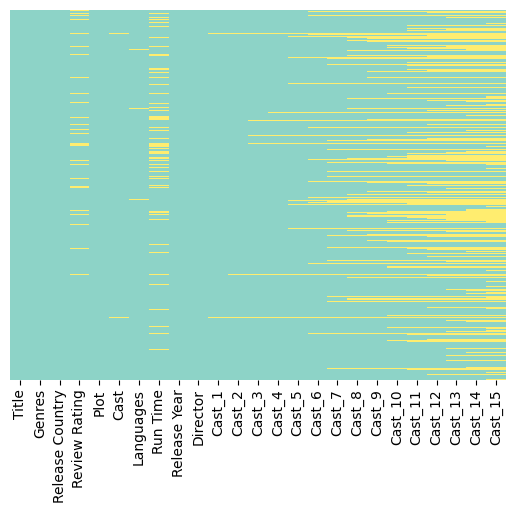

In [71]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Set3')

In [72]:
# Replace missing values in specific columns with a certain value (e.g., 'X')
columns_to_fill = ['Title', 'Genres', 'Release Country', 'Plot', 'Release Year', 'Director', 'Review Rating', 'Cast', 'Languages', 'Run Time']
value_to_fill = 'UNKNOWN'

df[columns_to_fill] = df[columns_to_fill].fillna(value_to_fill)

print(df)

                                     Title  \
0                               Gut (2012)   
1          The Haunting of Mia Moss (2017)   
2                      Sleepwalking (2017)   
3      Treasure Chest of Horrors II (2013)   
4                           Infidus (2015)   
...                                    ...   
3323            Victor Frankenstein (2015)   
3324  The Exorcism of Molly Hartley (2015)   
3325                    Talon Falls (2017)   
3326    BloodRayne: The Third Reich (2011)   
3327                     13 Cameras (2015)   

                                   Genres Release Country Review Rating  \
0                 Drama| Horror| Thriller             USA           3.9   
1                                  Horror             USA       UNKNOWN   
2                                  Horror          Canada       UNKNOWN   
3                Comedy| Horror| Thriller             USA           3.7   
4                    Crime| Drama| Horror             USA           5.8 

In [73]:
df.isnull().sum()

Title                 0
Genres                0
Release Country       0
Review Rating         0
Plot                  0
Cast                  0
Languages             0
Run Time              0
Release Year          0
Director              0
Cast_1               14
Cast_2               22
Cast_3               50
Cast_4              101
Cast_5              176
Cast_6              259
Cast_7              359
Cast_8              465
Cast_9              583
Cast_10             710
Cast_11             857
Cast_12             980
Cast_13            1116
Cast_14            1250
Cast_15            1378
dtype: int64

In [74]:
df['Run Time'].unique()

array(['91', 'UNKNOWN', '82', '80', '93', '90', '117', '138', '87', '70',
       '72', '85', '102', '86', '105', '64', '100', '95', '88', '75',
       '84', '83', '89', '74', '125', '140', '135', '81', '116', '104',
       '69', '99', '96', '73', '108', '119', '94', '52', '76', '79',
       '120', '137', '60', '92', '124', '67', '78', '71', '61', '118',
       '16', '144', '98', '101', '151', '110', '114', '136', '77', '65',
       '45', '97', '122', '106', '109', '123', '131', '113', '156', '103',
       '126', '111', '48', '132', '130', '139', '107', '66', '49', '51',
       '150', '68', '180', '166', '133', '134', '59', '63', '112', '145',
       '46', '115', '50', '141', '163', '55', '47', '160', '62', '127',
       '159', '147', '128', '53', '153', '12', '155', '170', '129', '142',
       '121', '22', '56', '146'], dtype=object)

In [75]:
df['Run Time'].value_counts().head(60)

UNKNOWN    544
90         237
80         135
85         111
95         110
88          99
86          97
89          96
84          96
82          92
91          86
93          86
87          84
92          82
81          77
83          72
94          70
100         58
98          55
96          54
75          52
97          49
78          47
101         45
105         43
79          41
99          37
77          35
76          32
71          29
73          28
120         27
108         26
104         26
110         25
70          25
102         24
103         23
72          21
106         20
74          19
107         17
119         15
109         14
118         12
114         12
116         10
112         10
69           9
113          8
125          8
65           8
117          7
134          7
45           7
63           7
111          7
122          7
115          6
127          6
Name: Run Time, dtype: int64

In [76]:
df

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director,...,Cast_6,Cast_7,Cast_8,Cast_9,Cast_10,Cast_11,Cast_12,Cast_13,Cast_14,Cast_15
0,Gut (2012),Drama| Horror| Thriller,USA,3.9,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,91,2012,Elias,...,Angie Bullaro,Ria Burns-Wilder,Miles Joris-Peyrafitte,Karl Pfeiffer,Leisa Haddad,Misty Gonzalez,Jordan Sariego,Christine Kadets,Deborah J. Atuk,J. Brett Rose
1,The Haunting of Mia Moss (2017),Horror,USA,UNKNOWN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,UNKNOWN,2017,Jake Zelch,...,Asalee Biagioli,Emily Christina,Erin Felts,Jerri Gerth,Dustin Hubbard,Justin Isom Jr.,Erik Kommer,Mackenzie Lampkin-Isom,Ben Milke,Destinie Orndoff
2,Sleepwalking (2017),Horror,Canada,UNKNOWN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,UNKNOWN,2017,David Briggs,...,Starlotte Dresen,Melanie Durette,Emilie Overton,Corey Pascall,Lindsay Primeau,Trish Rainone,Tammy-lynn Wilcox,None,None,None
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,USA,3.7,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,82,2013,"M. Kelley, Shawn C. Phillips, Alex Powers",...,Brent Buser,Miles Dougal,Joseph Frantz,M. Kelley,Brendan Mitchell,Joben Penuliar,Ethan Phillips,Kim Phillips,Stephen Phillips,Alex Powers
4,Infidus (2015),Crime| Drama| Horror,USA,5.8,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,80,2015,Giulio De Santi,...,Walter Montano,Cristiano Mazzacane,Simone Paternosto,Adrian Baigus,Domenico Deltreppo,Manolo Di Rocco,Stefania Caratelli,Christian Riva,Domenico Vagnati,Roberta Abatiello
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,Victor Frankenstein (2015),Drama| Horror| Sci-Fi| Thriller,USA,6.0,Directed by Paul McGuigan. With Daniel Radclif...,Daniel Radcliffe|Jessica Brown Findlay|Bronson...,English,110,2015,Paul McGuigan,...,Spencer Wilding,Robin Pearce,Andrew Scott,Callum Turner,Di Botcher,Eve Ponsonby,Will Keen,Louise Brealey,Nicola Sloane,Freddie Fox
3324,The Exorcism of Molly Hartley (2015),Horror,USA,4.6,"Directed by Steven R. Monroe. With Sarah Lind,...",Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,English,96,2015,Steven R,...,Julia Arkos,Tom McLaren,Bradley Sawatzky,Steve Weller,Ernesto Griffith,Robert Borges,Scott Johnson,Andrew Cecon,Eric Blais,Kristen Harris
3325,Talon Falls (2017),Horror,USA,4.6,"Directed by Joshua Shreve. With Brad Bell, Jor...",Brad Bell|Jordyn Rudolph|Ryan Rudolph|Morgan W...,English,75,2017,Joshua Shreve,...,None,None,None,None,None,None,None,None,None,None
3326,BloodRayne: The Third Reich (2011),Action| Adventure| Fantasy| Horror,Japan,3.0,"Directed by Uwe Boll. With Natassia Malthe, Br...",Natassia Malthe|Brendan Fletcher|Michael Paré|...,English,79,2012,Uwe Boll,...,Clint Howard,Steffen Mennekes,Arved Birnbaum,Safiya Kaygin,Nik Goldman,Vili Matula,Boris Bakal,Davorka Tovilo,Dora Lipovcan,Katarina Brozincevic


In [77]:
# Check for duplicated cells in a specific column (e.g., 'Column1')
duplicated_cells = df['Title'].duplicated()

# Print the rows with duplicated cells in the specific column
duplicated_cells.sum()

25

In [78]:
# Strip whitespace from the 'Title' column and then drop duplicates
df['Title'] = df['Title'].str.strip()
df_no_duplicates = df.drop_duplicates(subset='Title')

# Print the DataFrame with duplicated titles removed
print(df_no_duplicates)

                                     Title  \
0                               Gut (2012)   
1          The Haunting of Mia Moss (2017)   
2                      Sleepwalking (2017)   
3      Treasure Chest of Horrors II (2013)   
4                           Infidus (2015)   
...                                    ...   
3323            Victor Frankenstein (2015)   
3324  The Exorcism of Molly Hartley (2015)   
3325                    Talon Falls (2017)   
3326    BloodRayne: The Third Reich (2011)   
3327                     13 Cameras (2015)   

                                   Genres Release Country Review Rating  \
0                 Drama| Horror| Thriller             USA           3.9   
1                                  Horror             USA       UNKNOWN   
2                                  Horror          Canada       UNKNOWN   
3                Comedy| Horror| Thriller             USA           3.7   
4                    Crime| Drama| Horror             USA           5.8 

In [79]:
df_no_duplicates.head()

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director,...,Cast_6,Cast_7,Cast_8,Cast_9,Cast_10,Cast_11,Cast_12,Cast_13,Cast_14,Cast_15
0,Gut (2012),Drama| Horror| Thriller,USA,3.9,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,91,2012,Elias,...,Angie Bullaro,Ria Burns-Wilder,Miles Joris-Peyrafitte,Karl Pfeiffer,Leisa Haddad,Misty Gonzalez,Jordan Sariego,Christine Kadets,Deborah J. Atuk,J. Brett Rose
1,The Haunting of Mia Moss (2017),Horror,USA,UNKNOWN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,UNKNOWN,2017,Jake Zelch,...,Asalee Biagioli,Emily Christina,Erin Felts,Jerri Gerth,Dustin Hubbard,Justin Isom Jr.,Erik Kommer,Mackenzie Lampkin-Isom,Ben Milke,Destinie Orndoff
2,Sleepwalking (2017),Horror,Canada,UNKNOWN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,UNKNOWN,2017,David Briggs,...,Starlotte Dresen,Melanie Durette,Emilie Overton,Corey Pascall,Lindsay Primeau,Trish Rainone,Tammy-lynn Wilcox,None,None,None
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,USA,3.7,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,82,2013,"M. Kelley, Shawn C. Phillips, Alex Powers",...,Brent Buser,Miles Dougal,Joseph Frantz,M. Kelley,Brendan Mitchell,Joben Penuliar,Ethan Phillips,Kim Phillips,Stephen Phillips,Alex Powers
4,Infidus (2015),Crime| Drama| Horror,USA,5.8,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,80,2015,Giulio De Santi,...,Walter Montano,Cristiano Mazzacane,Simone Paternosto,Adrian Baigus,Domenico Deltreppo,Manolo Di Rocco,Stefania Caratelli,Christian Riva,Domenico Vagnati,Roberta Abatiello


In [80]:
# Get a Series of duplicated titles
duplicated_titles = df[df.duplicated(subset='Title', keep=False)]['Title']

# Print the duplicated titles
print(duplicated_titles)

49      Visceral: Entre las cuerdas de la locura (2012)
71                               Shame the Devil (2013)
100                                 Bad Building (2015)
130                                  The Lurking (2015)
233                           Blood Demon Rising (2017)
289                                      The Owl (2014)
291                                Quadrant 9EV9 (2016)
404                                        Aaaah (2014)
412                                      Darling (2015)
433                                     Infected (2013)
499        Five Nights at Freddy's: The Fan Film (2016)
532     Visceral: Entre las cuerdas de la locura (2012)
562                                       Séance (2006)
609                           Cementerio General (2013)
622                Rape Zombie: Lust of the Dead (2012)
632                                       Siccîn (2014)
667                                 Model Hunger (2016)
678                                Greatful Dead

In [81]:
# Clean the 'Title' column by stripping whitespace and converting to lowercase
df['Title'] = df['Title'].str.strip().str.lower()

# Drop duplicates in the 'Title' column and keep each unique 'Title' once
df_no_duplicates = df.drop_duplicates(subset='Title')

# Reset the DataFrame index
df_no_duplicates.reset_index(drop=True, inplace=True)

df = df_no_duplicates

# Print the resulting DataFrame without duplicates
print(df)

                                     Title  \
0                               gut (2012)   
1          the haunting of mia moss (2017)   
2                      sleepwalking (2017)   
3      treasure chest of horrors ii (2013)   
4                           infidus (2015)   
...                                    ...   
3298            victor frankenstein (2015)   
3299  the exorcism of molly hartley (2015)   
3300                    talon falls (2017)   
3301    bloodrayne: the third reich (2011)   
3302                     13 cameras (2015)   

                                   Genres Release Country Review Rating  \
0                 Drama| Horror| Thriller             USA           3.9   
1                                  Horror             USA       UNKNOWN   
2                                  Horror          Canada       UNKNOWN   
3                Comedy| Horror| Thriller             USA           3.7   
4                    Crime| Drama| Horror             USA           5.8 

In [82]:
# Get a Series of duplicated titles
duplicated_titles = df[df.duplicated(subset='Title', keep=False)]['Title']

# Print the duplicated titles
print(duplicated_titles)

Series([], Name: Title, dtype: object)


In [83]:
df.duplicated().sum()

0

<Axes: >

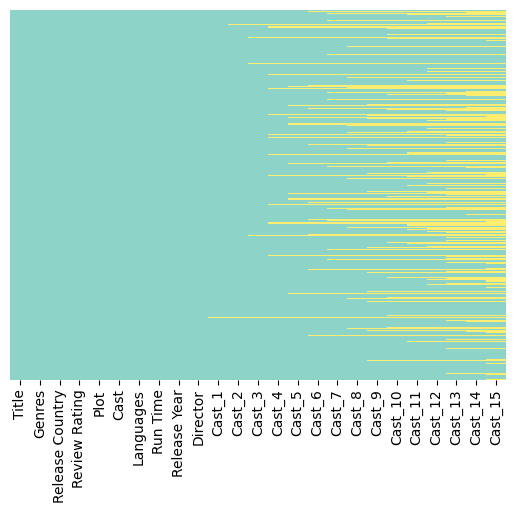

In [84]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Set3')

In [85]:
# Specify the column names you want to join
selected_columns = ['Cast_1', 'Cast_2', 'Cast_3', 'Cast_4', 'Cast_5', 'Cast_6', 'Cast_7', 'Cast_8', 'Cast_9', 'Cast_10', 'Cast_11', 'Cast_12', 'Cast_13', 'Cast_14', 'Cast_15']

# Use the melt function to stack the selected columns and create a new 'Combined_Cast' column
df2 = df[selected_columns].melt(var_name='Combined_Cast', value_name='Cast_names').dropna().reset_index(drop=True)

print(df2)

      Combined_Cast            Cast_names
0            Cast_1            Jason Vail
1            Cast_1          Nicola Fiore
2            Cast_1          Alysia Topol
3            Cast_1        Veronica Ricci
4            Cast_1           Bonini Mino
...             ...                   ...
41292       Cast_15  Brett Luciana Murray
41293       Cast_15         Hugh Ettinger
41294       Cast_15           Freddie Fox
41295       Cast_15        Kristen Harris
41296       Cast_15  Katarina Brozincevic

[41297 rows x 2 columns]


In [86]:
# Drop one or more columns
columns_to_drop = ['Combined_Cast']  # List of column names to drop
df2 = df2.drop(columns=columns_to_drop)

In [87]:
df2.value_counts()

Cast_names          
Lloyd Kaufman           29
Eric Roberts            28
Debbie Rochon           22
Maria Olsen             21
Bill Oberst Jr.         18
                        ..
Gregory M. Brown         1
Gregory Lee Cason        1
Gregory Konow            1
Gregory J. Fryer         1
Þorsteinn Gunnarsson     1
Length: 33822, dtype: int64

In [88]:
df2['Cast_names'].unique()

array(['Jason Vail', 'Nicola Fiore', 'Alysia Topol', ..., 'Freddie Fox',
       'Kristen Harris', 'Katarina Brozincevic'], dtype=object)

In [89]:
df2.head()

,Cast_names
0,Jason Vail
1,Nicola Fiore
2,Alysia Topol
3,Veronica Ricci
4,Bonini Mino


In [90]:
cast = df2
cast.to_excel('cast_names_data.xlsx')

In [91]:
# Drop one or more columns
columns_to_drop = ['Cast_1', 'Cast_2', 'Cast_3', 'Cast_4', 'Cast_5', 'Cast_6', 'Cast_7', 'Cast_8', 'Cast_9', 'Cast_10', 'Cast_11', 'Cast_12', 'Cast_13', 'Cast_14', 'Cast_15']  # List of column names to drop
df = df.drop(columns=columns_to_drop)
df.head(2)

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
0,gut (2012),Drama| Horror| Thriller,USA,3.9,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,91,2012,Elias
1,the haunting of mia moss (2017),Horror,USA,UNKNOWN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,UNKNOWN,2017,Jake Zelch


In [96]:
result = df[df['Director'].str.contains("Andrew Jones")]
result

,Title,Genres,Release Country,Review Rating,Plot,Cast,Languages,Run Time,Release Year,Director
503,valley of the witch (2014),Horror,USA,5.0,"Directed by Andrew Jones. With Rachel Howells,...",Rachel Howells|Lee Bane|Alison Lenihan|Jared M...,English,90,2015,Andrew Jones
523,poltergeist activity (2015),Horror,USA,3.3,"Directed by Andrew Jones. With Lee Bane, Natal...",Lee Bane|Natalie Martins|Jared Morgan|Judith H...,English,84,2015,Andrew Jones
818,theatre of fear (2014),Horror,USA,3.9,"Directed by Andrew Jones. With Jared Morgan, L...",Jared Morgan|Lee Bane|Nathan Head|Sam Harding|...,English,90,2015,Andrew Jones
1053,a haunting at the rectory (2015),Horror,UK,3.5,"Directed by Andrew Jones. With Lee Bane, Suzie...",Lee Bane|Suzie Frances Garton|Tom Bonington|Sa...,English,88,2015,Andrew Jones
1691,the last house on cemetery lane (2015),Horror,USA,3.5,"Directed by Andrew Jones. With Lee Bane, Vivie...",Lee Bane|Vivien Bridson|Georgina Blackledge|Ia...,UNKNOWN,82,2015,Andrew Jones
2124,the amityville asylum (2013),Horror,UK,2.9,Directed by Andrew Jones. With Sophia Del Pizz...,Sophia Del Pizzo|Lee Bane|Jared Morgan|Eileen ...,English,88,2013,Andrew Jones
2311,the curse of robert the doll (2016),Horror,UK,4.3,"Directed by Andrew Jones. With Lee Bane, Nigel...",Lee Bane|Nigel Barber|Tiffany Ceri|Suzie Franc...,UNKNOWN,79,2016,Andrew Jones
2558,the exorcism of anna ecklund (2016),Horror,UK,2.7,"Directed by Andrew Jones. With Lee Bane, Tiffa...",Lee Bane|Tiffany Ceri|Jeff Raggett|Judith Hale...,UNKNOWN,75,2016,Andrew Jones
2606,robert and the toymaker (2017),Horror,UK,4.8,"Directed by Andrew Jones. With Lee Bane, Erick...",Lee Bane|Erick Hayden|Jo Weil|Nathan Head|Soph...,English,84,2017,Andrew Jones
2949,robert (2015),Horror,UK,3.2,Directed by Andrew Jones. With Suzie Frances G...,Suzie Frances Garton|Lee Bane|Flynn Allen|Judi...,UNKNOWN,90,2015,Andrew Jones


<Axes: >

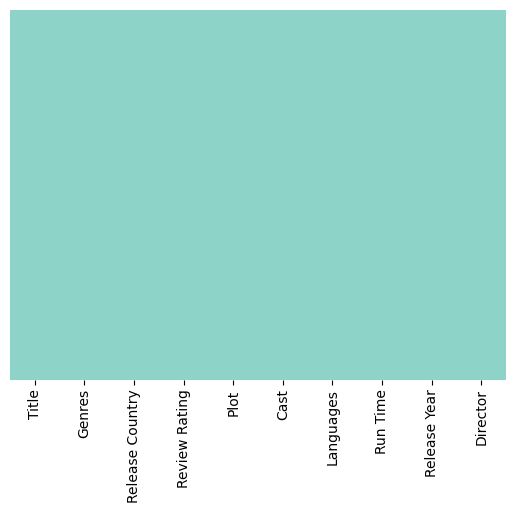

In [93]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Set3')

In [94]:
data = df

In [95]:
data.to_excel('cleaned_horror_movies_data.xlsx')